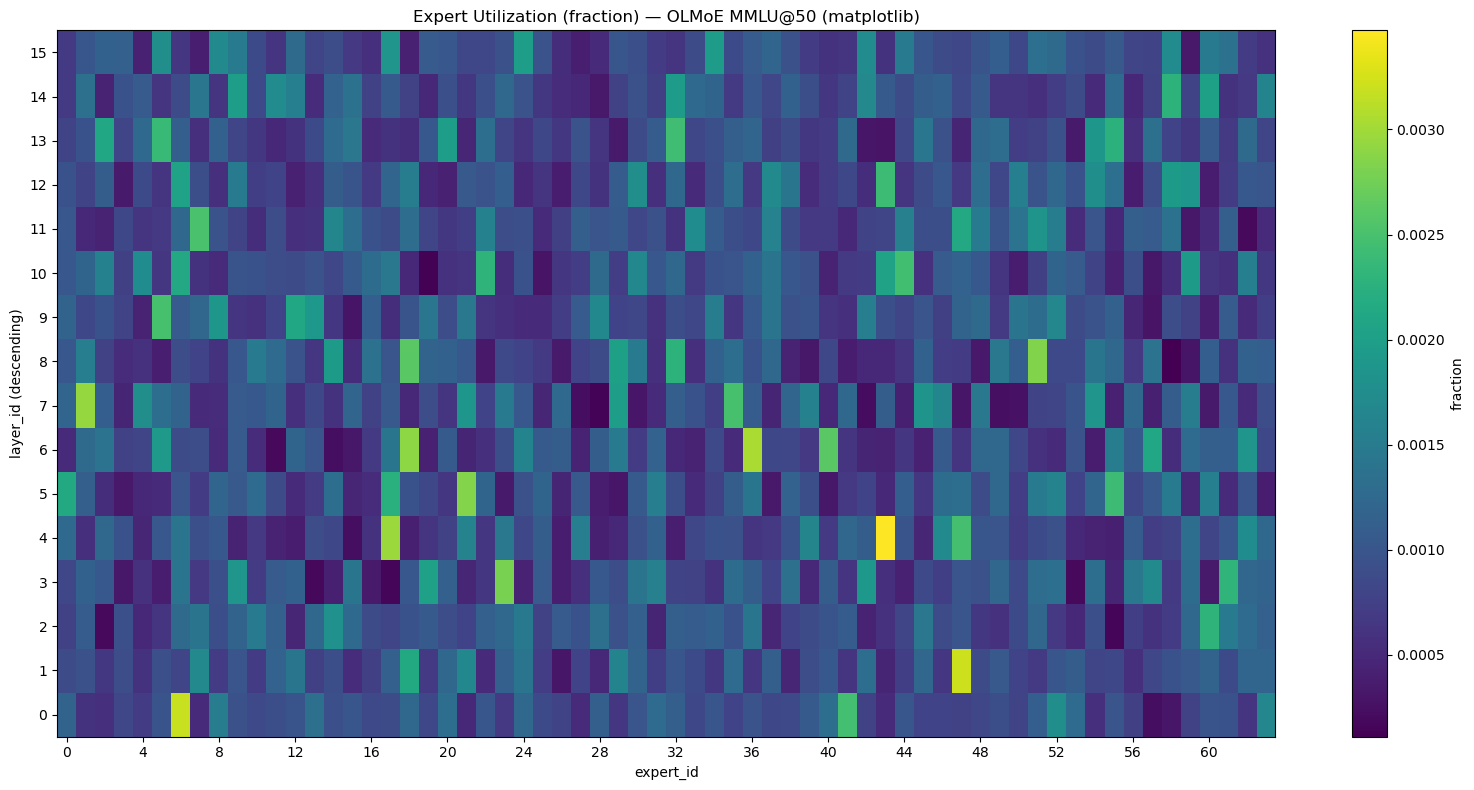

Heatmap saved to: /Users/superone77/Code/AlphaQuant/olmoe_mmlu_50_utilization_heatmap_matplotlib.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Read data
csv_path = Path('/Users/superone77/Code/AlphaQuant/olmoe_mmlu_50_utilization.csv')
df = pd.read_csv(csv_path)

# Pivot to layer x expert matrix (y=layer, x=expert), reverse layer order, ensure experts sorted, and fill missing with 0
heatmap_df = (
    df.pivot(index='layer', columns='expert', values='fraction')
      .sort_index(ascending=False)  # layers descending on y-axis
      .sort_index(axis=1)           # experts ascending on x-axis
      .fillna(0.0)
)

# Plot with matplotlib
plt.figure(figsize=(16, 8))
arr = heatmap_df.values
im = plt.imshow(arr, origin='upper', aspect='auto', cmap='viridis')
cbar = plt.colorbar(im)
cbar.set_label('fraction')

# Ticks (sparser to keep it readable)
num_layers, num_experts = arr.shape
x_step = 4 if num_experts > 32 else 1
y_step = 4 if num_layers > 32 else 1
xticks = np.arange(0, num_experts, x_step)
yticks = np.arange(0, num_layers, y_step)
plt.xticks(xticks, heatmap_df.columns[::x_step])
plt.yticks(yticks, heatmap_df.index[::y_step])

plt.xlabel('expert_id')
plt.ylabel('layer_id (descending)')
plt.title('Expert Utilization (fraction) — OLMoE MMLU@50 (matplotlib)')
plt.tight_layout()

# Save and show
out_path = Path('/Users/superone77/Code/AlphaQuant/olmoe_mmlu_50_utilization_heatmap_matplotlib.png')
plt.savefig(out_path, dpi=200, bbox_inches='tight')
plt.show()

print(f'Heatmap saved to: {out_path}')